K means Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/notebook

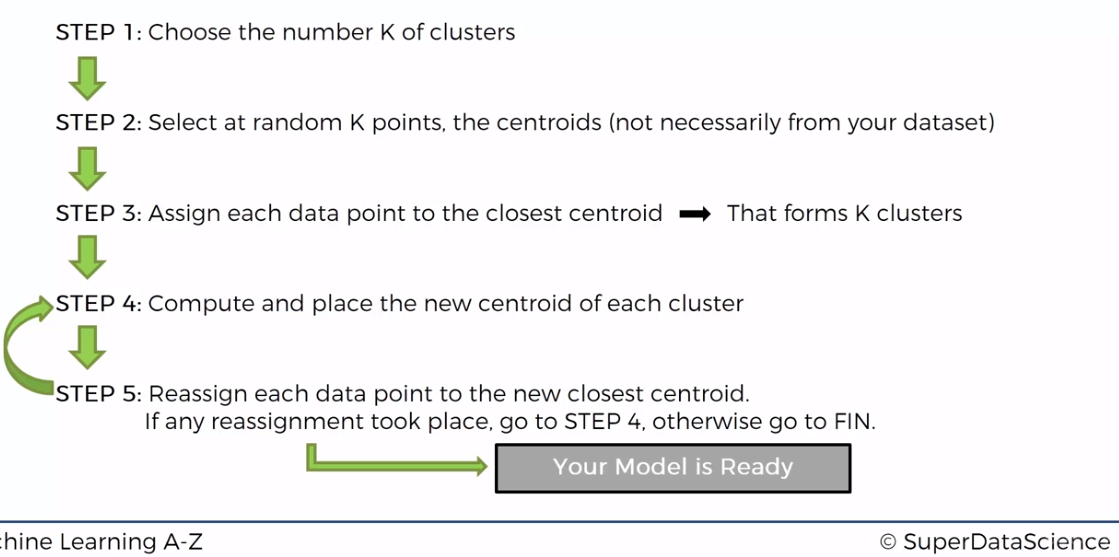

In [2]:
# importing libraries    
import numpy as nm
import matplotlib.pyplot as plt 
import pandas as pd    

In [3]:
# Importing the dataset  
df = pd.read_csv('/home/soumia/datascience/Mall_Customers.csv')  

In [4]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.drop_duplicates(inplace=True)

In [6]:
##Extracting Independent Variables
# using only Spending_Score and income variable for easy visualisation
x = df.iloc[:, [3, 4]].values  

Choosing the right K
The Elbow Method is then used to choose the best K value. The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for Within Cluster Sum of Squares. It should be low. Here's the formula representation for example when K = 3

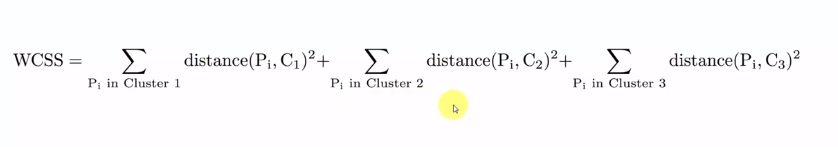





Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. 




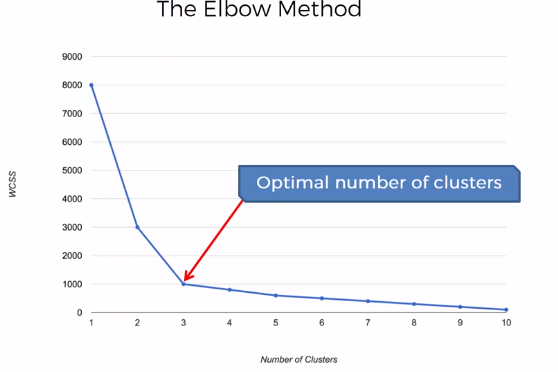

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

n_clustersint, default=8
The number of clusters to form as well as the number of centroids to generate.

init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
Method for initialization:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/home/soumia/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


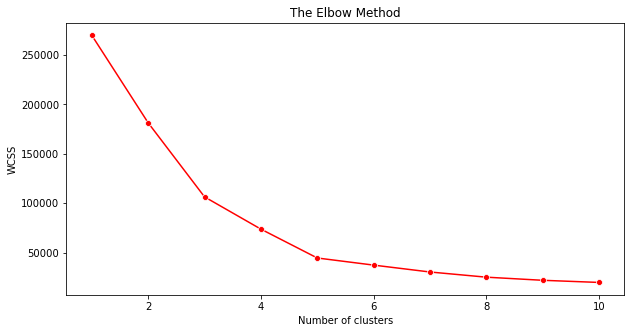

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

In [8]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(x)
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


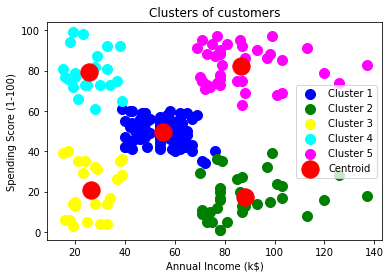

In [22]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroid')   
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()